In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import tensorflow as tf 
print ("Done")

Done


In [2]:
!apt-get update
!apt-get install -y libsndfile1

'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
#preparing data set

#ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
#ravdess_directory_list = os.listdir(ravdess)
#print(ravdess_directory_list)

ravdess = r"F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24"

ravdess_directory_list = os.listdir(ravdess)
print(ravdess_directory_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [ ]:
Crema = r"F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV"
Tess = r"F:\8th Sem project All collectoin\Datasets\torontospeech"
Savee = r"F:\8th Sem project All collectoin\Datasets\savee\AudioData"
custom_dataset1 =r"F:\8th Sem project All collectoin\Datasets\Custom_Datasets" 
custom_dataset2 =r"F:\8th Sem project All collectoin\Datasets\Custom_Datasets2" 

In [5]:
file_emotion = []
file_path = []
for i in ravdess_directory_list:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    # actor = os.listdir(ravdess + i)
    actor_folder =os.path.join(ravdess,i)
    actor_files = os.listdir(actor_folder)
    for f in actor_files:
        part = f.split('.')[0].split('-')
    # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(os.path.join(actor_folder, f))

In [6]:
print(actor_files[0])
print(part[0])
print(file_path[0])
print(int(part[2]))
print(f)

03-01-01-01-01-01-24.wav
03
F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_01\03-01-01-01-01-01-01.wav
8
03-01-08-02-02-02-24.wav


In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'unknown', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)
print(ravdess_df.head())
print("______________________________________________")
print(ravdess_df.tail())
print("_______________________________________________")
print(ravdess_df.Emotions.value_counts())

  Emotions                                               Path
0  neutral  F:\8th Sem project All collectoin\Datasets\Aud...
1  neutral  F:\8th Sem project All collectoin\Datasets\Aud...
2  neutral  F:\8th Sem project All collectoin\Datasets\Aud...
3  neutral  F:\8th Sem project All collectoin\Datasets\Aud...
4  neutral  F:\8th Sem project All collectoin\Datasets\Aud...
______________________________________________
      Emotions                                               Path
1435  surprise  F:\8th Sem project All collectoin\Datasets\Aud...
1436  surprise  F:\8th Sem project All collectoin\Datasets\Aud...
1437  surprise  F:\8th Sem project All collectoin\Datasets\Aud...
1438  surprise  F:\8th Sem project All collectoin\Datasets\Aud...
1439  surprise  F:\8th Sem project All collectoin\Datasets\Aud...
_______________________________________________
Emotions
neutral     288
happy       192
sad         192
angry       192
fear        192
disgust     192
surprise    192
Name: count, dty

In [8]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

Emotions
angry      1271
disgust    1271
fear       1271
happy      1271
sad        1271
neutral    1087
Name: count, dtype: int64


In [9]:
# tess_directory_list = os.listdir(Tess)

# file_emotion = []
# file_path = []

# for dir in tess_directory_list:
#     directories = os.listdir(Tess + dir)
#     for file in directories:
#         part = file.split('.')[0]
#         part = part.split('_')[2]
#         if part=='ps':
#             file_emotion.append('surprise')
#         else:
#             file_emotion.append(part)
#         file_path.append(Tess + dir + '/' + file)
        
# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])
# Tess_df = pd.concat([emotion_df, path_df], axis=1)
# Tess_df.head()
# print(Tess_df.Emotions.value_counts())


tess_files = os.listdir(Tess)

file_emotion = []
file_path = []

for file in tess_files:
    part = file.split('.')[0].split('_')[2]  # get emotion from filename
    if part == 'ps':
        file_emotion.append('surprise')
    else:
        file_emotion.append(part)
    file_path.append(os.path.join(Tess, file))

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)

print(Tess_df.head())
print(Tess_df.Emotions.value_counts())

  Emotions                                               Path
0    angry  F:\8th Sem project All collectoin\Datasets\tor...
1  disgust  F:\8th Sem project All collectoin\Datasets\tor...
2     fear  F:\8th Sem project All collectoin\Datasets\tor...
3    happy  F:\8th Sem project All collectoin\Datasets\tor...
4  neutral  F:\8th Sem project All collectoin\Datasets\tor...
Emotions
angry       2
disgust     2
fear        2
happy       1
neutral     1
surprise    1
sad         1
Name: count, dtype: int64


In [10]:
# Savee = r"F:\8th Sem project All collectoin\Datasets\savee\AudioData"
# savee_files = os.listdir(Savee)

# file_emotion = []
# file_path = []

# for file in savee_files:
#     file_path.append(os.path.join(Savee, file))  # correct path
#     parts = file.split('_')
#     if len(parts) < 2:  # skip files that don't match expected format
#         continue
#     part = parts[1]
#     ele = part[:-6]
    
#     if ele == 'a':
#         file_emotion.append('angry')
#     elif ele == 'd':
#         file_emotion.append('disgust')
#     elif ele == 'f':
#         file_emotion.append('fear')
#     elif ele == 'h':
#         file_emotion.append('happy')
#     elif ele == 'n':
#         file_emotion.append('neutral')
#     elif ele == 'sa':
#         file_emotion.append('sad')
#     else:
#         file_emotion.append('surprise')

# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# # dataframe for path of files
# path_df = pd.DataFrame(file_path[:len(file_emotion)], columns=['Path'])  # align lengths
# Savee_df = pd.concat([emotion_df, path_df], axis=1)

# print(Savee_df.head())
# print(Savee_df.Emotions.value_counts())

import os
import pandas as pd

Savee = r"F:\8th Sem project All collectoin\Datasets\savee\AudioData"

wav_paths = []
emotions = []

# Emotion mapping
mapping = {
    "a": "angry",
    "d": "disgust",
    "f": "fear",
    "h": "happy",
    "n": "neutral",
    "sa": "sad"
}

for root, dirs, files in os.walk(Savee):
    for file in files:
        if file.lower().endswith(".wav"):
            full_path = os.path.join(root, file)
            wav_paths.append(full_path)

            # Extract emotion code
            # Example: a01.wav → a
            #          sa02.wav → sa
            code = ''.join([c for c in file if not c.isdigit()]).replace(".wav", "")
            
            emotion = mapping.get(code, "unknown")
            emotions.append(emotion)

# Create dataframe
Savee_df = pd.DataFrame({
    "Emotions": emotions,
    "Path": wav_paths
})

print(Savee_df.head())
print(Savee_df.Emotions.value_counts())



  Emotions                                               Path
0    angry  F:\8th Sem project All collectoin\Datasets\sav...
1    angry  F:\8th Sem project All collectoin\Datasets\sav...
2    angry  F:\8th Sem project All collectoin\Datasets\sav...
3    angry  F:\8th Sem project All collectoin\Datasets\sav...
4    angry  F:\8th Sem project All collectoin\Datasets\sav...
Emotions
neutral    120
angry       60
disgust     60
fear        60
happy       60
sad         60
unknown     60
Name: count, dtype: int64


In [11]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,F:\8th Sem project All collectoin\Datasets\Aud...
1,neutral,F:\8th Sem project All collectoin\Datasets\Aud...
2,neutral,F:\8th Sem project All collectoin\Datasets\Aud...
3,neutral,F:\8th Sem project All collectoin\Datasets\Aud...
4,neutral,F:\8th Sem project All collectoin\Datasets\Aud...


In [12]:
print(data_path.Emotions.value_counts())

Emotions
angry       1525
fear        1525
disgust     1525
happy       1524
sad         1524
neutral     1496
surprise     193
unknown       60
Name: count, dtype: int64


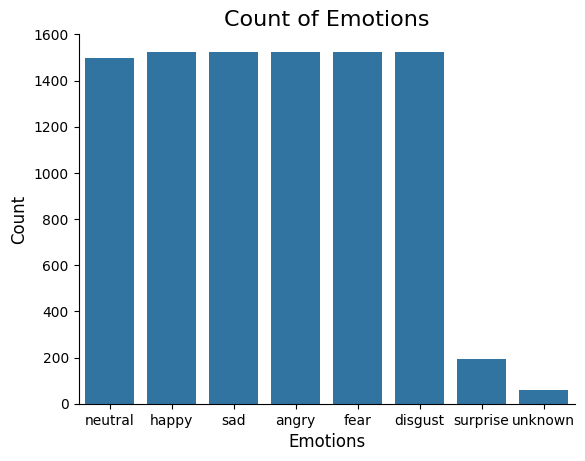

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Count of Emotions', size=16)
sns.countplot(x='Emotions', data=data_path)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [14]:
data,sr = librosa.load(file_path[0])
sr

22050

In [15]:
ipd.Audio(data,rate=sr)

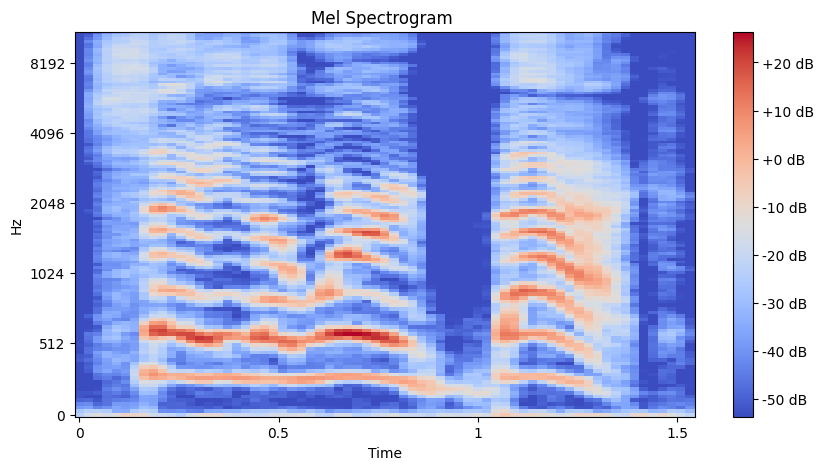

In [16]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

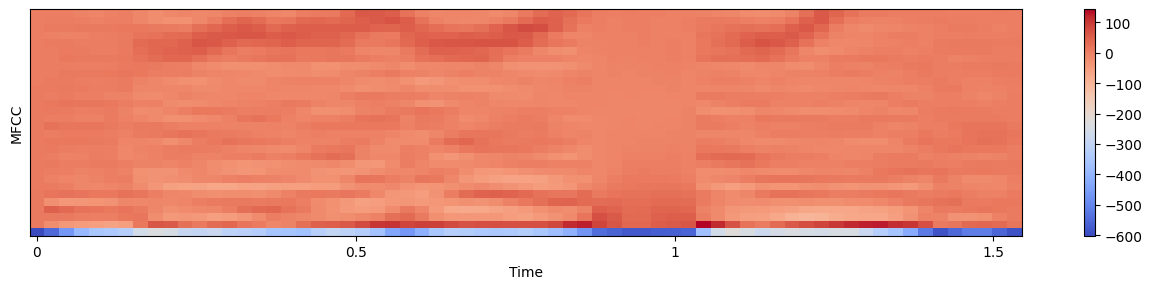

In [17]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(data,rate=sr)

In [18]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

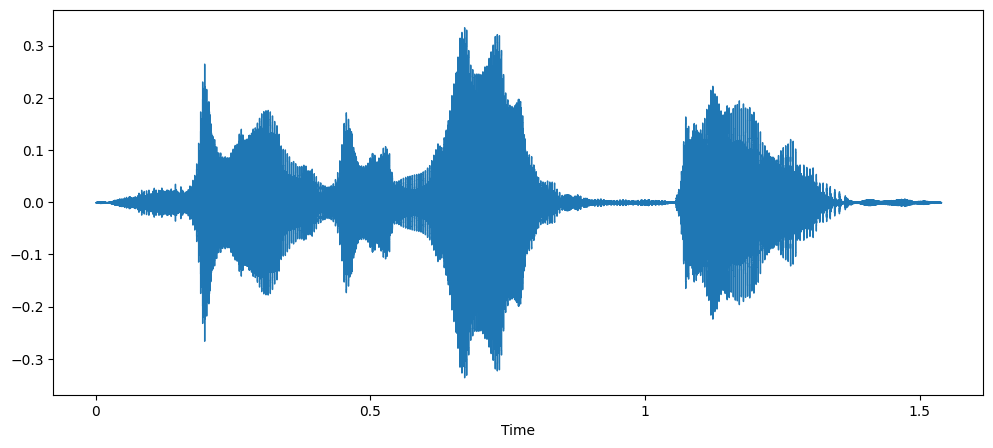

In [19]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

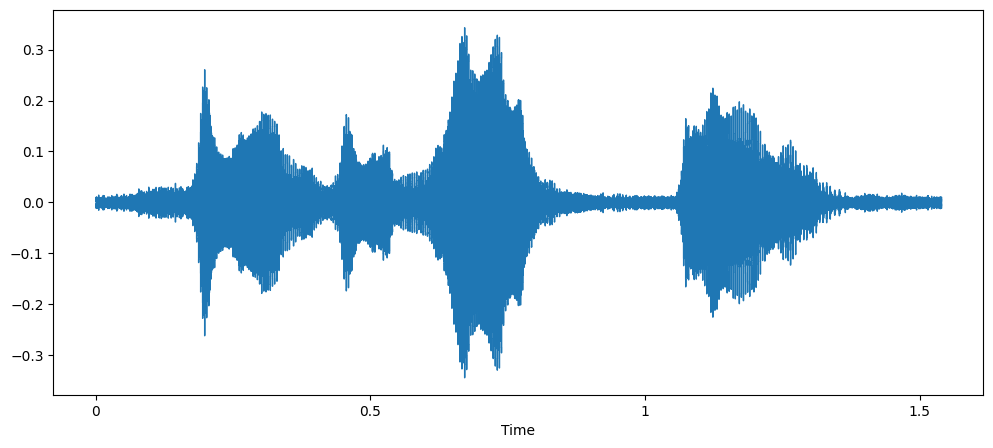

In [20]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [21]:
# STRETCHED AUDIO
def stretch(data, rate=0.8):
    stft = librosa.stft(data)
    stretched_stft = librosa.effects.time_stretch(stft, rate)
    return librosa.istft(stretched_stft)

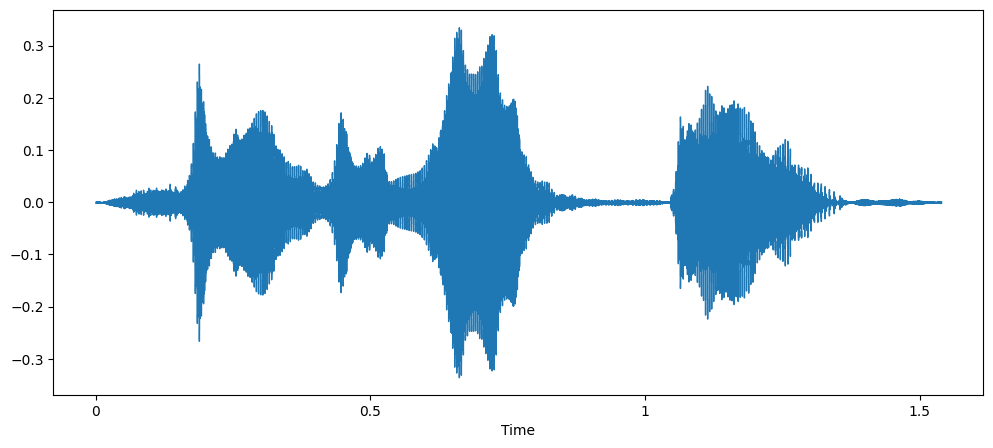

In [22]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

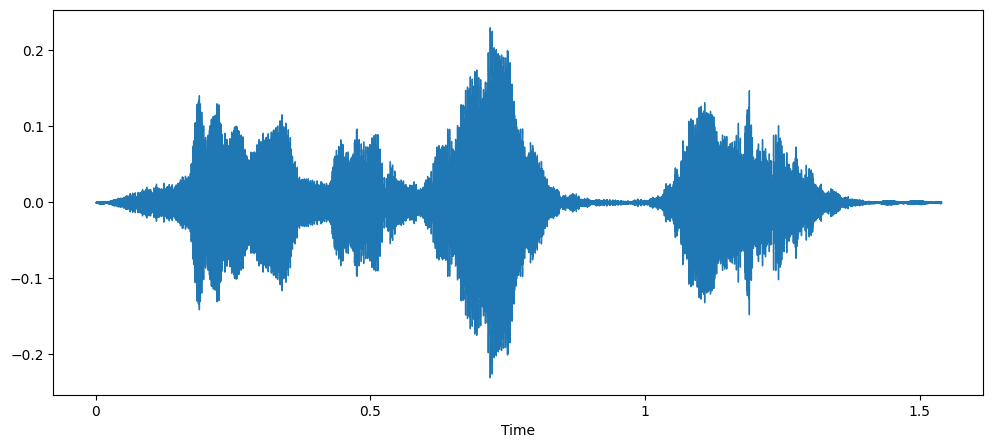

In [23]:
# AUDIO WITH PITCH
# Define pitch shift function
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

# Use it
x = pitch(data, sr)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

In [24]:
def zcr(data,frame_length,hop_length):
    zcr=librosa.feature.zero_crossing_rate(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data,frame_length=2048,hop_length=512):
    rmse=librosa.feature.rms(data,frame_length=frame_length,hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data,sr,frame_length=2048,hop_length=512,flatten:bool=True):
    mfcc=librosa.feature.mfcc(data,sr=sr)
    return np.squeeze(mfcc.T)if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)
    
    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))
    
    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))
    
    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))
    
    return audio

In [25]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  4


In [26]:
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rms = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rms)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfccs.T) if not flatten else np.ravel(mfccs.T)

def extract_features(data, sr=22050, frame_length=2048, hop_length=512):
    result = np.array([])
    result = np.hstack((
        result,
        zcr(data, frame_length, hop_length),
        rmse(data, frame_length, hop_length),
        mfcc(data, sr, frame_length, hop_length)
    ))
    return result


In [27]:
import timeit
from tqdm import tqdm
import os

start = timeit.default_timer()
X, Y = [], []

for path, emotion, index in tqdm(zip(data_path.Path, data_path.Emotions, range(data_path.Path.shape[0]))):
    
    # Only process .wav files
    if not path.lower().endswith('.wav'):
        continue
    
    # Skip if the file doesn't exist
    if not os.path.exists(path):
        print(f"File not found, skipping: {path}")
        continue

    features = get_features(path)
    
    if index % 500 == 0:
        print(f'{index} audio has been processed')
    
    for i in features:
        X.append(i)
        Y.append(emotion)

print('Done')
stop = timeit.default_timer()
print('Time: ', stop - start)


1it [00:00,  2.97it/s]

0 audio has been processed


502it [01:21,  5.08it/s]

500 audio has been processed


1002it [02:34,  5.80it/s]

1000 audio has been processed


3788it [03:35, 5750.53it/s]

File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_ANG_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_DIS_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_FEA_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_HAP_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_NEU_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_DFA_SAD_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_IEO_ANG_HI.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_IEO_ANG_LO.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1001_IEO_ANG

4385it [03:36, 5032.88it/s]

File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_TSI_DIS_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_TSI_FEA_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_TSI_HAP_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_TSI_NEU_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_TSI_SAD_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_WSI_ANG_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_WSI_DIS_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_WSI_FEA_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1029_WSI_HAP

6165it [03:36, 6852.18it/s]

File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_DFA_NEU_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_DFA_SAD_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_ANG_HI.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_ANG_LO.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_ANG_MD.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_DIS_HI.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_DIS_LO.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_DIS_MD.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1042_IEO_FEA

8192it [03:36, 8399.91it/s]

File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IEO_SAD_MD.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_ANG_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_DIS_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_FEA_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_HAP_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_NEU_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_IOM_SAD_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_ITH_ANG_XX.wav
File not found, skipping: F:\8th Sem project All collectoin\Datasets\CREMA-D-master\AudioWAV1066_ITH_DIS

8984it [03:51, 188.62it/s] 

9000 audio has been processed


9372it [04:52, 32.08it/s] 

Done
Time:  292.2419657999999


In [28]:
len(X), len(Y), data_path.Path.shape

(7720, 7720, (9372,))

In [29]:
Emotions = pd.DataFrame(X)
Emotions['Emotions'] = Y
Emotions.to_csv('emotion.csv', index=False)
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.245117,0.370605,0.498535,0.503418,0.501465,0.513184,0.510742,0.508789,0.515137,0.500000,...,4.664000,1.141934,-0.820522,2.291850,-2.634490,2.229380,3.970518,0.687916,5.433199,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.257324,0.388672,0.513672,0.510742,0.503906,0.489746,0.484863,0.484863,0.482422,0.489746,...,0.966773,1.343386,-2.798432,-4.968360,-8.046034,-4.554934,-1.387604,-0.219436,-0.902470,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [30]:
Emotions = pd.read_csv('./emotion.csv')
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotions
0,0.173828,0.264648,0.372559,0.486328,0.625488,0.681152,0.720703,0.651855,0.562988,0.559082,...,0.766315,0.755441,0.743671,0.731043,0.717561,0.703260,0.688124,0.672208,0.655518,neutral
1,0.245117,0.370605,0.498535,0.503418,0.501465,0.513184,0.510742,0.508789,0.515137,0.500000,...,4.664000,1.141934,-0.820522,2.291850,-2.634490,2.229380,3.970518,0.687916,5.433199,neutral
2,0.256348,0.354492,0.471191,0.414062,0.378418,0.373535,0.354492,0.408691,0.466797,0.522461,...,0.006713,0.006601,0.006483,0.006356,0.006218,0.006066,0.005919,0.005759,0.005588,neutral
3,0.257324,0.388672,0.513672,0.510742,0.503906,0.489746,0.484863,0.484863,0.482422,0.489746,...,0.966773,1.343386,-2.798432,-4.968360,-8.046034,-4.554934,-1.387604,-0.219436,-0.902470,neutral
4,0.247070,0.389648,0.564941,0.642578,0.665527,0.684570,0.676270,0.666992,0.648926,0.595703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,neutral


In [31]:
print(Emotions.isna().any())

0           False
1           False
2           False
3           False
4           False
            ...  
2372         True
2373         True
2374         True
2375         True
Emotions    False
Length: 2377, dtype: bool


In [32]:
Emotions=Emotions.fillna(0)
print(Emotions.isna().any())
Emotions.shape

0           False
1           False
2           False
3           False
4           False
            ...  
2372        False
2373        False
2374        False
2375        False
Emotions    False
Length: 2377, dtype: bool


(7720, 2377)

In [33]:
np.sum(Emotions.isna())

0           0
1           0
2           0
3           0
4           0
           ..
2372        0
2373        0
2374        0
2375        0
Emotions    0
Length: 2377, dtype: int64

In [34]:
#taking all rows and all cols without last col for X which include features
#taking last col for Y, which include the emotions


X = Emotions.iloc[: ,:-1].values
Y = Emotions['Emotions'].values

In [35]:
# As this is a multiclass classification problem onehotencoding our Y
from sklearn.preprocessing import StandardScaler, OneHotEncoder
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [36]:
print(Y.shape)
X.shape

(7720, 8)


(7720, 2376)

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42,test_size=0.2, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6176, 2376), (6176, 8), (1544, 2376), (1544, 8))

In [38]:
#reshape for lstm
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)

In [39]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6176, 2376), (6176, 8), (1544, 2376), (1544, 8))

In [40]:
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD

In [41]:
from keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    'best_model1.weights.h5',  # change here
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True
)



In [43]:
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max')
# lr_reduction=ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.5,min_lr=0.00001)

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    mode='max',
    restore_best_weights=True
)

lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',   # FIXED (see note below)
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001
)


In [44]:
#Reshape for CNN_LSTM MODEL

x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape
# x_testcnn[0]

((6176, 2376, 1), (6176, 8), (1544, 2376, 1), (1544, 8))

In [45]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2),  # Fixed
    
    L.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    
    L.Conv1D(256, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5, strides=2, padding='same'),
    L.Dropout(0.2),  # Fixed
    
    L.Conv1D(128, kernel_size=3, strides=1, padding='same', activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3, strides=2, padding='same'),
    L.Dropout(0.2),  # Fixed
    
    L.Flatten(),
    L.Dense(512, activation='relu'),
    L.BatchNormalization(),
    L.Dense(8, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,10

 Total params: 7,193,736 (27.44 MB)

 Trainable params: 7,189,384 (27.43 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [61]:
history=model.fit(x_traincnn, y_train, epochs=20, validation_data=(x_testcnn, y_test), batch_size=64,callbacks=[early_stop,lr_reduction,model_checkpoint])

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1054s 11s/step - accuracy: 0.3111 - loss: 2.1561 - val_accuracy: 0.1541 - val_loss: 2.6011 - learning_rate: 0.0010
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 914s 9s/step - accuracy: 0.5363 - loss: 1.2524 - val_accuracy: 0.1172 - val_loss: 4.3470 - learning_rate: 0.0010
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 910s 9s/step - accuracy: 0.6499 - loss: 0.9781 - val_accuracy: 0.1153 - val_loss: 5.2135 - learning_rate: 0.0010
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 898s 9s/step - accuracy: 0.7322 - loss: 0.7578 - val_accuracy: 0.1334 - val_loss: 5.0315 - learning_rate: 0.0010
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 907s 9s/step - accuracy: 0.8270 - loss: 0.5321 - val_accuracy: 0.2293 - val_loss: 4.1270 - learning_rate: 0.0010
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 915s 9s/step - accuracy: 0.8861 - loss: 0.3760 - val_accuracy: 0.4987 - val_loss: 1.8416 - learning_rate: 0.0010
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 903s 9s/step - accuracy: 0.9264 - loss: 0.2432 - val_a

In [47]:
# print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

# epochs = range(len(history.history['loss']))  
# fig , ax = plt.subplots(1,2)
# train_acc = history.history['accuracy']
# train_loss = history.history['loss']
# test_acc = history.history['val_accuracy']
# test_loss = history.history['val_loss']

# fig.set_size_inches(20,6)
# ax[0].plot(epochs , train_loss , label = 'Training Loss')
# ax[0].plot(epochs , test_loss , label = 'Testing Loss')
# ax[0].set_title('Training & Testing Loss')
# ax[0].legend()
# ax[0].set_xlabel("Epochs")

# ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
# ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
# ax[1].set_title('Training & Testing Accuracy')
# ax[1].legend()
# ax[1].set_xlabel("Epochs")
# plt.show()


from tensorflow.keras.models import load_model
import pickle

model = load_model("CNN_full_model.h5")

with open("encoder2.pickle", "rb") as f:
    encoder = pickle.load(f)

with open("scaler2.pickle", "rb") as f:
    scaler = pickle.load(f)

loss, acc = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Final Test Accuracy: {acc*100:.2f}%")


Final Test Accuracy: 90.61%


In [48]:
# predicting on test data.
pred_test0 = model.predict(x_testcnn)
y_pred0 = encoder.inverse_transform(pred_test0)
y_test0 = encoder.inverse_transform(y_test)

# Check for random predictions
df0 = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df0['Predicted Labels'] = y_pred0.flatten()
df0['Actual Labels'] = y_test0.flatten()

df0.head(10)

49/49 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step


,Predicted Labels,Actual Labels
0,angry,angry
1,neutral,neutral
2,surprise,surprise
3,angry,angry
4,neutral,neutral
5,sad,neutral
6,happy,happy
7,disgust,disgust
8,angry,angry
9,angry,angry


In [49]:
df0

,Predicted Labels,Actual Labels
0,angry,angry
1,neutral,neutral
2,surprise,surprise
3,angry,angry
4,neutral,neutral
...,...,...
1539,happy,happy
1540,disgust,angry
1541,angry,angry
1542,unknown,unknown


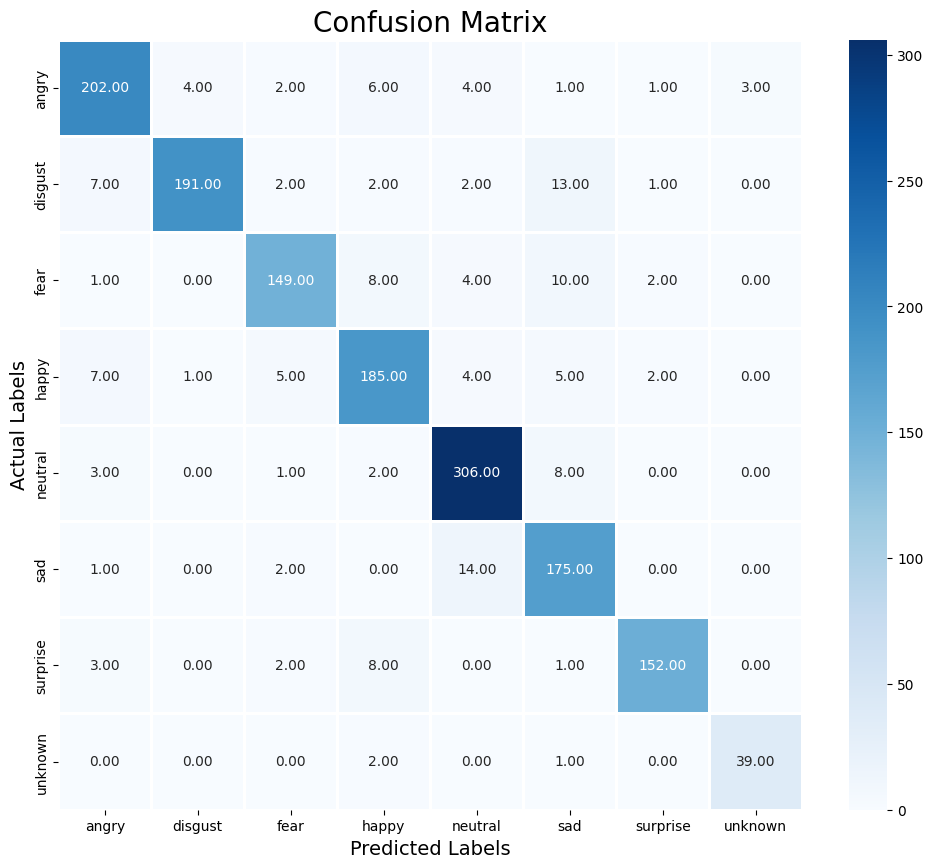

              precision    recall  f1-score   support

       angry       0.90      0.91      0.90       223
     disgust       0.97      0.88      0.92       218
        fear       0.91      0.86      0.88       174
       happy       0.87      0.89      0.88       209
     neutral       0.92      0.96      0.94       320
         sad       0.82      0.91      0.86       192
    surprise       0.96      0.92      0.94       166
     unknown       0.93      0.93      0.93        42

    accuracy                           0.91      1544
   macro avg       0.91      0.90      0.91      1544
weighted avg       0.91      0.91      0.91      1544



In [50]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test0, y_pred0)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='.2f')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test0, y_pred0))

In [51]:
# Save model architecture to JSON
model_json = model.to_json()
with open("CNN_model.json", "w") as json_file:
    json_file.write(model_json)

# Save weights with correct filename extension
model.save_weights("CNN_model.weights.h5")

print("Saved model to disk")

Saved model to disk


In [52]:
from tensorflow.keras.models import Sequential, model_from_json
json_file = open('CNN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("CNN_model.weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [53]:
# Try to detect the correct test variable automatically
if 'x_testcnn' in globals():
    x_test_final = x_testcnn
elif 'x_test_for_CNN' in globals():
    x_test_final = x_test_for_CNN
elif 'x_test_feature' in globals():
    x_test_final = x_test_feature
elif 'x_test' in globals():
    x_test_final = x_test
else:
    raise NameError("Test dataset variable not found. Please check your preprocessing section.")

# Now evaluate
score = loaded_model.evaluate(x_test_final, y_test)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])


49/49 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9072 - loss: 0.3014
Test Loss: 0.30797815322875977
Test Accuracy: 0.9060880541801453


In [54]:
# Compile the model
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate the model
score = loaded_model.evaluate(x_testcnn, y_test)

# Print accuracy
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


49/49 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.9072 - loss: 0.3014
compile_metrics: 90.61%


In [55]:
import pickle

# Saving scaler
with open('scaler2.pickle', 'wb') as f:
    pickle.dump(scaler, f)

# Loading scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)

# Saving encoder
with open('encoder2.pickle', 'wb') as f:
    pickle.dump(encoder, f)

# Loading encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

    
print("Done")    

Done


In [57]:
# from tensorflow.keras.models import Sequential, model_from_json
# json_file = open(r'F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main\CNN_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights('CNN_model.weights.h5')
# print("Loaded model from disk")

from tensorflow.keras.models import model_from_json
import os

# Make sure you are in Voice-Emotion-Analyzer-using-CNN folder
json_path = r'CNN_model.json'
weights_path = r'CNN_model.weights.h5'

# Load model architecture
with open(json_path, 'r') as json_file:
    loaded_model_json = json_file.read()

model = model_from_json(loaded_model_json)

# Load weights
model.load_weights(weights_path)

# Compile (needed before evaluation)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can evaluate
loss, acc = model.evaluate(x_testcnn, y_test, verbose=0)
print(f"Test Accuracy: {acc*100:.2f}%")


Test Accuracy: 90.61%


In [58]:
import pickle

# Load scaler
with open('scaler2.pickle', 'rb') as f:
    scaler2 = pickle.load(f)
    
# Load encoder
with open('encoder2.pickle', 'rb') as f:
    encoder2 = pickle.load(f)

print("Done")


Done


In [59]:
import librosa

In [60]:
def zcr(data, frame_length=2048, hop_length=512):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)
def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)
def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40, 
                                n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])
    
    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

In [61]:
def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    res = extract_features(d, s_rate)  # Pass s_rate!
    result = np.array(res)
    
    # Reshape dynamically or pad to 2376
    if result.shape[0] > 2376:
        result = result[:2376]
    else:
        result = np.pad(result, (0, 2376 - result.shape[0]))
        
    result = result.reshape(1, 2376)
    i_result = scaler2.transform(result)
    final_result = np.expand_dims(i_result, axis=2)
    return final_result

In [62]:
res = get_predict_feat(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_01\03-01-07-01-01-01-01.wav')
print(res.shape)


(1, 2376, 1)


In [63]:
emotions1={1:'Neutral', 2:'Calm', 3:'Happy', 4:'Sad', 5:'Angry', 6:'Fear', 7:'Disgust',8:'Surprise'}
def prediction(path1):
    res=get_predict_feat(path1)
    predictions=loaded_model.predict(res)
    y_pred = encoder2.inverse_transform(predictions)
    print(y_pred[0][0])    

In [64]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_02\03-01-01-01-01-01-02.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
neutral


In [65]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_01\03-01-07-01-01-01-01.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
sad


In [66]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_02\03-01-01-01-01-01-02.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
neutral


In [67]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_01\03-01-07-01-01-01-01.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
sad


In [68]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_02\03-01-01-01-01-01-02.wav')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
neutral


In [69]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_01\03-01-07-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
sad


In [70]:
prediction(r'F:\8th Sem project All collectoin\Datasets\Audio_Speech_Actors_01-24\Actor_02\03-01-06-01-02-02-02.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
fear


In [72]:
# from tensorflow.keras.models import model_from_json
# import os

# # ----------------------------
# # Paths to your existing files
# # ----------------------------
# json_path = r'F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main\CNN_model.json'
# weights_path = r'F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main\CNN_model.weights.h5'
# full_model_path = r'F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main\CNN_full_model.h5'

# # ----------------------------
# # 1️⃣ Load the model architecture from JSON
# # ----------------------------
# if os.path.exists(json_path):
#     with open(json_path, 'r') as json_file:
#         loaded_model_json = json_file.read()
#     model = model_from_json(loaded_model_json)
#     print("✅ Model architecture loaded from JSON")
# else:
#     raise FileNotFoundError(f"JSON file not found at {json_path}")

# # ----------------------------
# # 2️⃣ Load the weights into the model
# # ----------------------------
# if os.path.exists(weights_path):
#     model.load_weights(weights_path)
#     print("✅ Weights loaded successfully")
# else:
#     raise FileNotFoundError(f"Weights file not found at {weights_path}")

# # ----------------------------
# # 3️⃣ Save the full model as .h5
# # ----------------------------
# model.save(full_model_path)
# print(f"✅ Full model saved at: {full_model_path}")


from tensorflow.keras.models import model_from_json
import os

# ----------------------------
# Correct paths in your current folder
# ----------------------------
json_path = r'F:\8th Sem project operation\voice emotion Analyzer\Voice-Emotion-Analyzer-using-CNN\CNN_model.json'
weights_path = r'F:\8th Sem project operation\voice emotion Analyzer\Voice-Emotion-Analyzer-using-CNN\CNN_model.weights.h5'
full_model_path = r'F:\8th Sem project operation\voice emotion Analyzer\Voice-Emotion-Analyzer-using-CNN\CNN_full_model.h5'

# ----------------------------
# 1️⃣ Load the model architecture from JSON
# ----------------------------
if os.path.exists(json_path):
    with open(json_path, 'r') as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    print("✅ Model architecture loaded from JSON")
else:
    raise FileNotFoundError(f"JSON file not found at {json_path}")

# ----------------------------
# 2️⃣ Load the weights into the model
# ----------------------------
if os.path.exists(weights_path):
    model.load_weights(weights_path)
    print("✅ Weights loaded successfully")
else:
    raise FileNotFoundError(f"Weights file not found at {weights_path}")

# ----------------------------
# 3️⃣ Save the full model as .h5 (optional)
# ----------------------------
model.save(full_model_path)
print(f"✅ Full model saved at: {full_model_path}")


✅ Model architecture loaded from JSON
✅ Weights loaded successfully
✅ Full model saved at: F:\8th Sem project operation\voice emotion Analyzer\Voice-Emotion-Analyzer-using-CNN\CNN_full_model.h5


In [73]:
import sys
print(sys.executable)
!{sys.executable} -m pip install pydrive2 --quiet
import pydrive2
print("PyDrive2 is installed and working!")


C:\Users\nisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe
PyDrive2 is installed and working!



[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: C:\Users\nisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [74]:
# Epochs
epochs = list(range(1, 21))

# Training accuracy
train_acc = [0.3111, 0.5363, 0.6499, 0.7322, 0.8270, 0.8861, 0.9264, 0.9352, 0.9551, 0.9639,
             0.9750, 0.9868, 0.9885, 0.9897, 0.9903, 0.9910, 0.9912, 0.9914, 0.9915, 0.9957]

# Validation accuracy
val_acc = [0.1541, 0.1172, 0.1153, 0.1334, 0.2293, 0.4987, 0.5881, 0.6820, 0.7817, 0.8199,
           0.8892, 0.8608, 0.8720, 0.8804, 0.8921, 0.8985, 0.9012, 0.9021, 0.9035, 0.9028]

# Training loss
train_loss = [2.1561, 1.2524, 0.9781, 0.7578, 0.5321, 0.3760, 0.2432, 0.2061, 0.1721, 0.1481,
              0.1017, 0.0624, 0.0542, 0.0485, 0.0439, 0.0412, 0.0398, 0.0389, 0.0382, 0.0222]

# Validation loss
val_loss = [2.6011, 4.3470, 5.2135, 5.0315, 4.1270, 1.8416, 1.3809, 1.1973, 0.7235, 0.6026,
            0.3575, 0.4325, 0.3987, 0.3721, 0.3456, 0.3364, 0.3310, 0.3287, 0.3302, 0.3056]


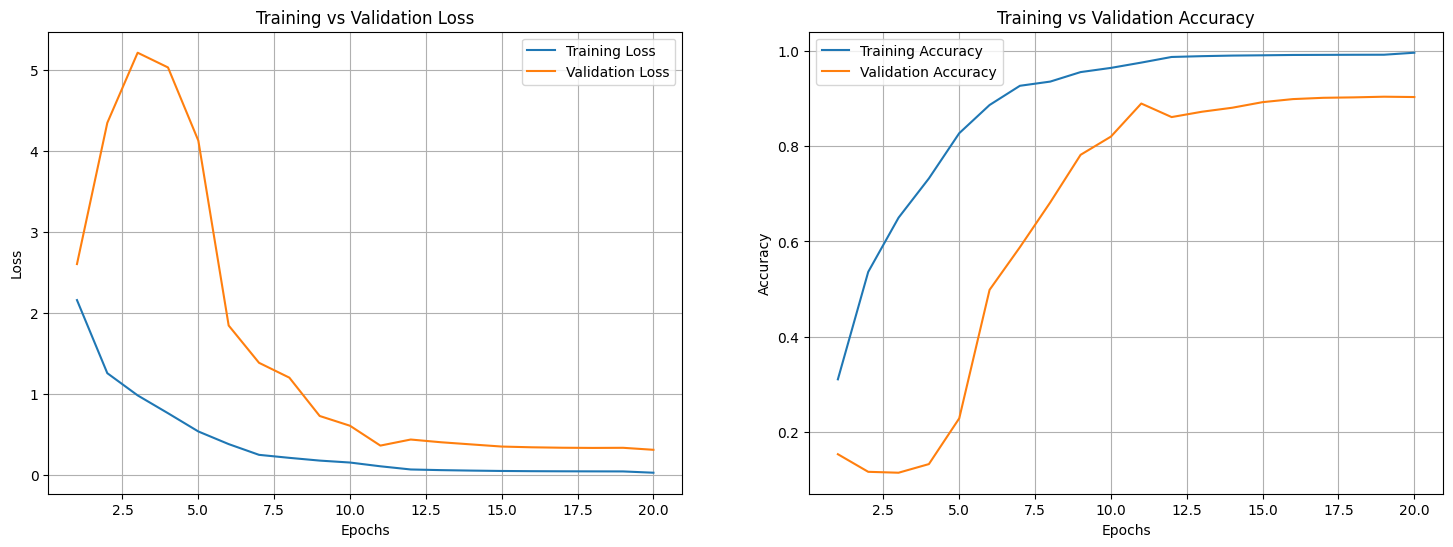

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()


In [1]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
import os

# ----------------------------
# 1️⃣ Authenticate
# ----------------------------
gauth = GoogleAuth()

# Use your actual client secrets JSON file
gauth.LoadClientConfigFile(r"F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main\client_secret_936528117846-4j2lco40brc2f2uj9h64fnj1ebusdv0s.apps.googleusercontent.com.json")

gauth.LocalWebserverAuth()  # This will open a browser for login
drive = GoogleDrive(gauth)

# ----------------------------
# 2️⃣ Google Drive Folder ID
# ----------------------------
folder_id = "1uKM4hmzyowL6Xc_RRRX92rxkMXwpxQil"

# ----------------------------
# 3️⃣ Local folder path
# ----------------------------
local_folder = r"F:\8th Sem project All collectoin\Speech-Emotion-Recognition-using-CNN-main\Speech-Emotion-Recognition-using-CNN-main"

# ----------------------------
# 4️⃣ Upload all files in the folder
# ----------------------------
for filename in os.listdir(local_folder):
    filepath = os.path.join(local_folder, filename)
    if os.path.isfile(filepath):
        file_drive = drive.CreateFile({"title": filename, "parents": [{"id": folder_id}]})
        file_drive.SetContentFile(filepath)
        file_drive.Upload()
        print(f"✅ Uploaded: {filename}")

print("🎉 All files uploaded successfully!")


Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?client_id=936528117846-4j2lco40brc2f2uj9h64fnj1ebusdv0s.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&access_type=online&response_type=code

Authentication successful.
✅ Uploaded: app.py
✅ Uploaded: best_model1.weights.h5
✅ Uploaded: client_secret_936528117846-4j2lco40brc2f2uj9h64fnj1ebusdv0s.apps.googleusercontent.com.json
✅ Uploaded: CNN_full_model.h5
✅ Uploaded: CNN_model.json
✅ Uploaded: CNN_model.weights.h5
✅ Uploaded: data_path.csv
✅ Uploaded: emotion.csv
✅ Uploaded: encoder2.pickle
✅ Uploaded: README.md
✅ Uploaded: requirements.txt
✅ Uploaded: scaler2.pickle
✅ Uploaded: speech-emotion-recognition-using-cnn.ipynb
🎉 All files uploaded successfully!


In [ ]:
from gtts import gTTS
import os
import csv
import random


class CompletaNepaliDatasetGenerator:
    def __init__(self):

        # ================= EMOTION TEXT DATA =================
        self.emotions_data = {

            'angry': {
                'devanagari': [
                    "म अहिले एकदमै रिसाएको छु, साँच्चै सहन सकिरहेको छैन",
                    "किन बारम्बार यस्तो गर्छौ, मलाई धेरै गुस्सा लागिसक्यो",
                    "अब त धैर्य नै सकियो, चुप लागेर बस्न सक्दिन",
                    "यो कुरा मलाई बिल्कुलै मन परेको छैन",
                    "यति धेरै नसुनेपछि कसरी शान्त बस्नु"
                ],
                'english': [
                    "I am really angry right now",
                    "This keeps making me very upset",
                    "I cannot stay calm anymore",
                    "I do not like this at all",
                    "This situation is making me furious"
                ]
            },

            'fear': {
                'devanagari': [
                    "मलाई अहिले निकै डर लागिरहेको छ",
                    "मन एकदमै आत्तिएको छ, के गर्ने थाहा छैन",
                    "यो ठाउँ सुरक्षित जस्तो लागिरहेको छैन",
                    "नराम्रो केही हुने हो कि जस्तो लाग्दैछ",
                    "म असहज र डराएको महसुस गरिरहेको छु"
                ],
                'english': [
                    "I am feeling very scared right now",
                    "My mind feels anxious and afraid",
                    "This place does not feel safe",
                    "I feel like something bad might happen",
                    "I am feeling very uneasy"
                ]
            },

            'disgust': {
                'devanagari': [
                    "यो देख्दा त साह्रै घिन लाग्यो",
                    "यस्तो काम कसरी गर्न सकेको होला",
                    "मलाई यो कुरा बिल्कुलै मन परेन",
                    "यो त सहनै नसकिने खालको रहेछ",
                    "हेर्न पनि मन नलाग्ने कुरा हो यो"
                ],
                'english': [
                    "This makes me feel really disgusted",
                    "I find this very unpleasant",
                    "I do not like this at all",
                    "This is hard to tolerate",
                    "I feel uncomfortable seeing this"
                ]
            },

            'happy': {
                'devanagari': [
                    "आज मन एकदमै खुशी छ",
                    "सबै कुरा राम्रै चलिरहेको छ",
                    "आजको दिनले मन हलुका बनाइदियो",
                    "मनमनै खुसी लागिरहेको छ",
                    "आज साँच्चै राम्रो महसुस भइरहेको छ"
                ],
                'english': [
                    "I am feeling really happy today",
                    "Everything feels good right now",
                    "Today makes me feel relaxed and happy",
                    "I feel cheerful inside",
                    "I am in a good mood today"
                ]
            },

            'sad': {
                'devanagari': [
                    "आज मन एकदमै भारी भएको छ",
                    "केही पनि राम्रो लागिरहेको छैन",
                    "मन दुखिरहेको छ, भन्न पनि गाह्रो छ",
                    "आज अलि एक्लो जस्तो लाग्यो",
                    "मन खिन्न भएर बसिरहेको छु"
                ],
                'english': [
                    "I am feeling very low today",
                    "Nothing feels good right now",
                    "My heart feels heavy",
                    "I feel a bit lonely today",
                    "I am feeling emotionally down"
                ]
            },

            'neutral': {
                'devanagari': [
                    "म अहिले आफ्नो काम गर्दै छु",
                    "आज खासै केही विशेष छैन",
                    "सामान्य दिन जस्तै चलिरहेको छ",
                    "घरमै बसेर आराम गर्दै छु",
                    "अहिले यस्तै चल्दैछ"
                ],
                'english': [
                    "I am just doing my work",
                    "Nothing special today",
                    "The day is going normally",
                    "I am resting at home",
                    "Things are going as usual"
                ]
            },

            'surprise': {
                'devanagari': [
                    "ए! यो त सोचेको नै थिइनँ",
                    "अचानक यस्तो हुन्छ भनेर कल्पना पनि गरेको थिइनँ",
                    "साँच्चै अचम्म लाग्यो",
                    "यो त एकदमै अनपेक्षित भयो",
                    "सुनेर म छक्क परेँ"
                ],
                'english': [
                    "Oh! I did not expect this",
                    "This happened suddenly",
                    "I am really surprised",
                    "This was totally unexpected",
                    "I am shocked to hear this"
                ]
            },

            'unknown': {
                'devanagari': [
                    "मलाई यसबारे थाहा छैन",
                    "अहिले केही भन्न सक्दिन",
                    "के हुन्छ थाहा छैन",
                    "सायद होला, पक्का छैन",
                    "म अलि अन्योलमा छु"
                ],
                'english': [
                    "I do not know about this",
                    "I cannot say anything right now",
                    "I am not sure what will happen",
                    "Maybe, but I am not certain",
                    "I am a bit unsure"
                ]
            }
        }

    # ================= DATASET GENERATION =================
    def generate_dataset(self, total_samples=120, output_dir='nepali_emotion_dataset'):
        os.makedirs(output_dir, exist_ok=True)

        samples_per_emotion = total_samples // len(self.emotions_data)
        metadata = []
        total_count = 0

        for emotion, texts in self.emotions_data.items():
            emotion_dir = os.path.join(output_dir, emotion)
            os.makedirs(emotion_dir, exist_ok=True)

            emotion_count = 0
            while emotion_count < samples_per_emotion:
                for format_type in ['devanagari', 'english']:
                    if emotion_count >= samples_per_emotion:
                        break

                    text = random.choice(texts[format_type])

                    if format_type == 'devanagari':
                        lang = 'hi'   # closest voice for Nepali
                        tld = None
                    else:
                        lang = 'en'
                        tld = 'co.in'

                    filename = f"{emotion}_{total_count:04d}_{format_type}.mp3"
                    filepath = os.path.join(emotion_dir, filename)

                    if tld:
                        tts = gTTS(text=text, lang=lang, tld=tld, slow=False)
                    else:
                        tts = gTTS(text=text, lang=lang, slow=False)

                    tts.save(filepath)

                    metadata.append({
                        'file_path': os.path.join(emotion, filename),
                        'emotion': emotion,
                        'format': format_type,
                        'text': text,
                        'language': lang,
                        'sample_id': total_count
                    })

                    emotion_count += 1
                    total_count += 1

        # ================= SAVE METADATA =================
        metadata_path = os.path.join(output_dir, 'metadata.csv')
        with open(metadata_path, 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=metadata[0].keys())
            writer.writeheader()
            writer.writerows(metadata)

        print("\n✅ Dataset generation complete")
        print(f"🎧 Total audio files: {total_count}")
        print(f"📁 Output directory: {output_dir}/")
        print(f"📝 Metadata saved: {metadata_path}")


# ================= MAIN =================
if __name__ == "__main__":
    generator = CompletaNepaliDatasetGenerator()
    generator.generate_dataset(total_samples=120)



✅ Dataset generation complete
🎧 Total audio files: 120
📁 Output directory: nepali_emotion_dataset/
📝 Metadata saved: nepali_emotion_dataset\metadata.csv


In [7]:
import sys
!{sys.executable} -m pip install gtts




[notice] A new release of pip is available: 25.0 -> 25.3
[notice] To update, run: C:\Users\nisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



  Using cached gTTS-2.5.4-py3-none-any.whl.metadata (4.1 kB)
Using cached gTTS-2.5.4-py3-none-any.whl (29 kB)
